In [1]:
#import os
import keras

#本作業可以不需使用GPU, 將GPU設定為"無"(若有GPU且想開啟, 可設為 "0")
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
#從Keras的內建功能中, 取得train與test資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
#將X與Y獨立放進變數
x_train, y_train = train
x_test, y_test = test
#資料前處理-將圖片標準化
x_train = x_train / 255.
x_test = x_test / 255.

#將資料從圖形(RGB)轉為向量(Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

#將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [5]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Epoch 1/500
196/196 [==============================] - 2s 11ms/step - loss: 2.2630 - accuracy: 0.1615 - val_loss: 2.2159 - val_accuracy: 0.2139
Epoch 2/500
196/196 [==============================] - 2s 11ms/step - loss: 2.1878 - accuracy: 0.2258 - val_loss: 2.1588 - val_accuracy: 0.2449
Epoch 3/500
196/196 [==============================] - 2s 11ms/step - loss: 2.1373 - accuracy: 0.2486 - val_loss: 2.1146 - val_accuracy: 0.2626
Epoch 4/500
196/196 [==============================] - 2s 11ms/step - loss: 2.0967 - accuracy: 0.2657 - val_loss: 2.0770 - val_accuracy: 0.2788
Epoch 5/500
196/196 [==============================] - 2s 11ms/step - loss: 2.0614 - accuracy: 0.2780 - val_loss: 2.0436 - val_accuracy: 0.2921
Epoch 6/500
196/196 [==============================] - 2s 11ms/step - loss: 2.0309 - accuracy: 0.2925 - val_loss: 2.0159 - val_accuracy: 0.3009
Epoch 7/500
196/196 [==============================] - 2s 11ms/step - loss: 2.0045 - accuracy: 0.3026 - val_loss: 1.9913 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 1.6658 - accuracy: 0.4203 - val_loss: 1.6734 - val_accuracy: 0.4158
Epoch 58/500
196/196 [==============================] - 2s 11ms/step - loss: 1.6629 - accuracy: 0.4218 - val_loss: 1.6678 - val_accuracy: 0.4200
Epoch 59/500
196/196 [==============================] - 2s 11ms/step - loss: 1.6599 - accuracy: 0.4231 - val_loss: 1.6648 - val_accuracy: 0.4226
Epoch 60/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6570 - accuracy: 0.4232 - val_loss: 1.6628 - val_accuracy: 0.4223
Epoch 61/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6540 - accuracy: 0.4258 - val_loss: 1.6613 - val_accuracy: 0.4211
Epoch 62/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6511 - accuracy: 0.4264 - val_loss: 1.6587 - val_accuracy: 0.4239
Epoch 63/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6483 - accuracy: 0.4274 - val_loss: 1.6582 - val_accuracy: 0.424

196/196 [==============================] - 2s 13ms/step - loss: 1.5323 - accuracy: 0.4669 - val_loss: 1.5543 - val_accuracy: 0.4571
Epoch 114/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5298 - accuracy: 0.4669 - val_loss: 1.5525 - val_accuracy: 0.4618
Epoch 115/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5281 - accuracy: 0.4697 - val_loss: 1.5523 - val_accuracy: 0.4569
Epoch 116/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5267 - accuracy: 0.4694 - val_loss: 1.5495 - val_accuracy: 0.4582
Epoch 117/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5247 - accuracy: 0.4695 - val_loss: 1.5514 - val_accuracy: 0.4579
Epoch 118/500
196/196 [==============================] - 2s 11ms/step - loss: 1.5227 - accuracy: 0.4709 - val_loss: 1.5480 - val_accuracy: 0.4573
Epoch 119/500
196/196 [==============================] - 2s 12ms/step - loss: 1.5209 - accuracy: 0.4717 - val_loss: 1.5441 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.4372 - accuracy: 0.4976 - val_loss: 1.4807 - val_accuracy: 0.4825
Epoch 170/500
196/196 [==============================] - 2s 11ms/step - loss: 1.4350 - accuracy: 0.5002 - val_loss: 1.4807 - val_accuracy: 0.4844
Epoch 171/500
196/196 [==============================] - 2s 11ms/step - loss: 1.4337 - accuracy: 0.5001 - val_loss: 1.4852 - val_accuracy: 0.4794
Epoch 172/500
196/196 [==============================] - 2s 11ms/step - loss: 1.4316 - accuracy: 0.5006 - val_loss: 1.4782 - val_accuracy: 0.4815
Epoch 173/500
196/196 [==============================] - 2s 11ms/step - loss: 1.4304 - accuracy: 0.5003 - val_loss: 1.4828 - val_accuracy: 0.4792
Epoch 174/500
196/196 [==============================] - 2s 12ms/step - loss: 1.4289 - accuracy: 0.5019 - val_loss: 1.4722 - val_accuracy: 0.4872
Epoch 175/500
196/196 [==============================] - 2s 13ms/step - loss: 1.4274 - accuracy: 0.5012 - val_loss: 1.4713 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.3569 - accuracy: 0.5253 - val_loss: 1.4258 - val_accuracy: 0.5003
Epoch 226/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3547 - accuracy: 0.5265 - val_loss: 1.4258 - val_accuracy: 0.5016
Epoch 227/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3536 - accuracy: 0.5262 - val_loss: 1.4250 - val_accuracy: 0.4988
Epoch 228/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3522 - accuracy: 0.5265 - val_loss: 1.4356 - val_accuracy: 0.4933
Epoch 229/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3508 - accuracy: 0.5271 - val_loss: 1.4264 - val_accuracy: 0.4990
Epoch 230/500
196/196 [==============================] - 2s 11ms/step - loss: 1.3499 - accuracy: 0.5286 - val_loss: 1.4258 - val_accuracy: 0.5015
Epoch 231/500
196/196 [==============================] - 2s 10ms/step - loss: 1.3485 - accuracy: 0.5269 - val_loss: 1.4218 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 1.2865 - accuracy: 0.5487 - val_loss: 1.3919 - val_accuracy: 0.5114
Epoch 282/500
196/196 [==============================] - 2s 11ms/step - loss: 1.2852 - accuracy: 0.5486 - val_loss: 1.3962 - val_accuracy: 0.5124
Epoch 283/500
196/196 [==============================] - 2s 11ms/step - loss: 1.2837 - accuracy: 0.5510 - val_loss: 1.4035 - val_accuracy: 0.5092
Epoch 284/500
196/196 [==============================] - 2s 11ms/step - loss: 1.2820 - accuracy: 0.5511 - val_loss: 1.3902 - val_accuracy: 0.5115
Epoch 285/500
196/196 [==============================] - 2s 11ms/step - loss: 1.2812 - accuracy: 0.5527 - val_loss: 1.3925 - val_accuracy: 0.5118
Epoch 286/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2801 - accuracy: 0.5517 - val_loss: 1.4059 - val_accuracy: 0.5067
Epoch 287/500
196/196 [==============================] - 2s 10ms/step - loss: 1.2789 - accuracy: 0.5511 - val_loss: 1.3894 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.2212 - accuracy: 0.5734 - val_loss: 1.3715 - val_accuracy: 0.5195
Epoch 338/500
196/196 [==============================] - 2s 13ms/step - loss: 1.2205 - accuracy: 0.5742 - val_loss: 1.3987 - val_accuracy: 0.5070
Epoch 339/500
196/196 [==============================] - 3s 13ms/step - loss: 1.2190 - accuracy: 0.5739 - val_loss: 1.3849 - val_accuracy: 0.5103
Epoch 340/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2182 - accuracy: 0.5745 - val_loss: 1.3645 - val_accuracy: 0.5221
Epoch 341/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2173 - accuracy: 0.5741 - val_loss: 1.3816 - val_accuracy: 0.5193
Epoch 342/500
196/196 [==============================] - 2s 13ms/step - loss: 1.2150 - accuracy: 0.5741 - val_loss: 1.3697 - val_accuracy: 0.5169
Epoch 343/500
196/196 [==============================] - 3s 14ms/step - loss: 1.2142 - accuracy: 0.5754 - val_loss: 1.3665 - val_accuracy:

196/196 [==============================] - 2s 10ms/step - loss: 1.1591 - accuracy: 0.5945 - val_loss: 1.3407 - val_accuracy: 0.5317
Epoch 394/500
196/196 [==============================] - 2s 12ms/step - loss: 1.1582 - accuracy: 0.5959 - val_loss: 1.3489 - val_accuracy: 0.5303
Epoch 395/500
196/196 [==============================] - 2s 11ms/step - loss: 1.1575 - accuracy: 0.5949 - val_loss: 1.3629 - val_accuracy: 0.5235
Epoch 396/500
196/196 [==============================] - 2s 12ms/step - loss: 1.1554 - accuracy: 0.5968 - val_loss: 1.3526 - val_accuracy: 0.5267
Epoch 397/500
196/196 [==============================] - 2s 11ms/step - loss: 1.1543 - accuracy: 0.5966 - val_loss: 1.3496 - val_accuracy: 0.5277
Epoch 398/500
196/196 [==============================] - 2s 11ms/step - loss: 1.1539 - accuracy: 0.5972 - val_loss: 1.3438 - val_accuracy: 0.5312
Epoch 399/500
196/196 [==============================] - 2s 12ms/step - loss: 1.1539 - accuracy: 0.5968 - val_loss: 1.3728 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 1.1008 - accuracy: 0.6160 - val_loss: 1.4093 - val_accuracy: 0.5145
Epoch 450/500
196/196 [==============================] - 2s 11ms/step - loss: 1.1006 - accuracy: 0.6146 - val_loss: 1.3407 - val_accuracy: 0.5323
Epoch 451/500
196/196 [==============================] - 2s 11ms/step - loss: 1.0983 - accuracy: 0.6156 - val_loss: 1.3421 - val_accuracy: 0.5333
Epoch 452/500
196/196 [==============================] - 2s 10ms/step - loss: 1.0971 - accuracy: 0.6177 - val_loss: 1.3430 - val_accuracy: 0.5326
Epoch 453/500
196/196 [==============================] - 2s 10ms/step - loss: 1.0963 - accuracy: 0.6186 - val_loss: 1.3546 - val_accuracy: 0.5284
Epoch 454/500
196/196 [==============================] - 2s 11ms/step - loss: 1.0941 - accuracy: 0.6196 - val_loss: 1.3477 - val_accuracy: 0.5328
Epoch 455/500
196/196 [==============================] - 2s 11ms/step - loss: 1.0936 - accuracy: 0.6190 - val_loss: 1.3437 - val_accuracy:

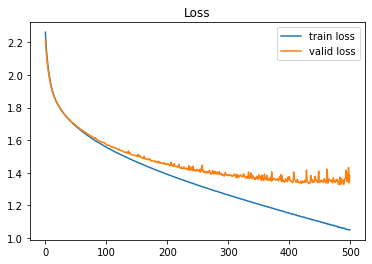

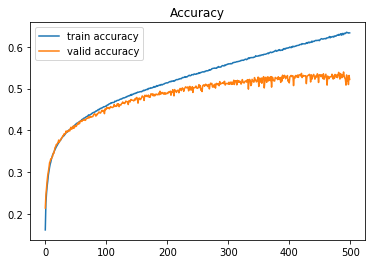

In [8]:
#以視覺畫方式檢視訓練過程
import matplotlib.pyplot as plt
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()